In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, join

In [2]:
kd_angular = Table.read('/home/aalvarez/Work/Data/SC8/PHZ_Prod_18oct2021/AngularKD.fits', hdu=1)
brute = Table.read('/home/aalvarez/Work/Data/SC8/PHZ_Prod_18oct2021/NnpzStarSed/bruteforce.fits', hdu=1)
cat = Table.read('/home/aalvarez/Work/Data/SC8/PHZ_Prod_18oct2021/GalaxyFilteringTask/star_catalog.fits')

kd_angular = join(kd_angular, cat, 'OBJECT_ID')
brute = join(brute, cat, 'OBJECT_ID')

kd_flagged = kd_angular['FLAGS_1'] != 0
brute_flagged = brute['FLAGS_1'] != 0

In [3]:
kd_flagged.sum() / len(kd_angular), brute_flagged.sum() / len(brute)

(0.41369606003752346, 0.386)

In [4]:
cols = [
    ('lsst/u', 'FLUX_U_EXT_LSST_TOTAL'),
    ('lsst/g', 'FLUX_G_EXT_LSST_TOTAL'),
    ('lsst/r', 'FLUX_R_EXT_LSST_TOTAL'),
    ('lsst/i', 'FLUX_I_EXT_LSST_TOTAL'),
    ('euclid/VIS', 'FLUX_DETECTION_TOTAL'),
    ('euclid/H', 'FLUX_H_TOTAL'),
    ('euclid/J', 'FLUX_J_TOTAL'),
    ('euclid/Y', 'FLUX_Y_TOTAL'),
]

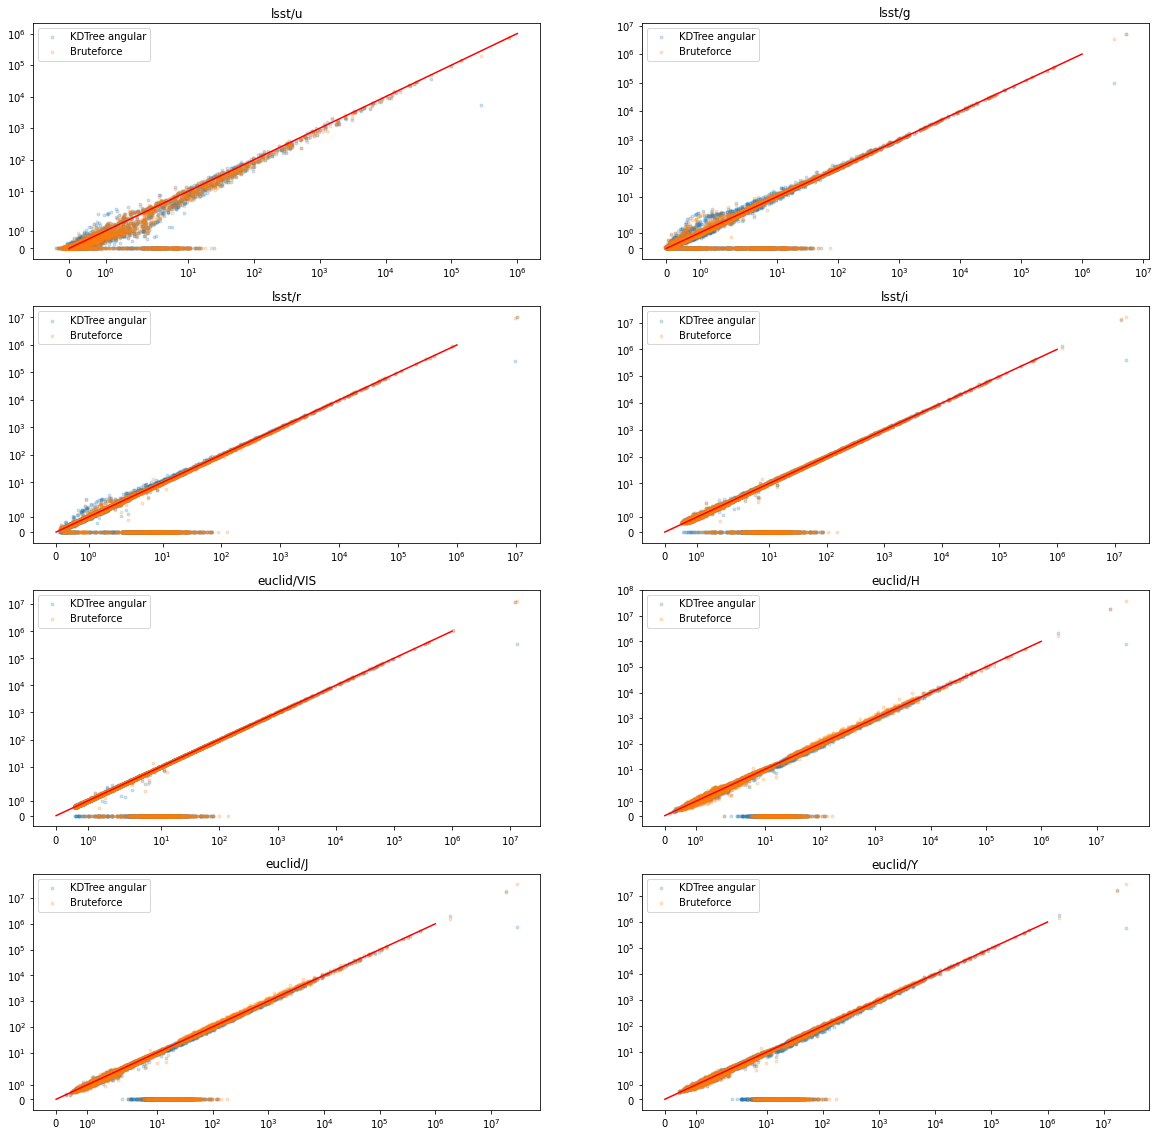

In [5]:
fig, axes = plt.subplots(ncols=2, nrows=len(cols)//2, figsize=(20, 20))
for (rcol, ccol), ax in zip(cols, axes.ravel()):
    ax.set_title(rcol)
    ax.scatter(kd_angular[ccol], kd_angular[rcol+'_MEAN'], label='KDTree angular', marker='.', alpha=0.2)
    ax.scatter(brute[ccol], brute[rcol+'_MEAN'], label='Bruteforce', marker='.', alpha=0.2)
    
    ax.set_xscale('symlog')
    ax.set_yscale('symlog')
    ax.plot([0, 1e6], [0, 1e6], c='red')
    ax.legend()
    
fig.savefig('/home/aalvarez/Downloads/euclid_kdangular.png')
plt.show()

In [6]:
cross = join(kd_angular, brute, 'OBJECT_ID')
cross = join(cross, cat, 'OBJECT_ID')
sub_band = [b for b in kd_angular.colnames if b.startswith('subaru/')][:12]

kd_flagged = cross['FLAGS_1_1'] != 0
brute_flagged = cross['FLAGS_1_2'] != 0
both_flagged = kd_flagged & brute_flagged

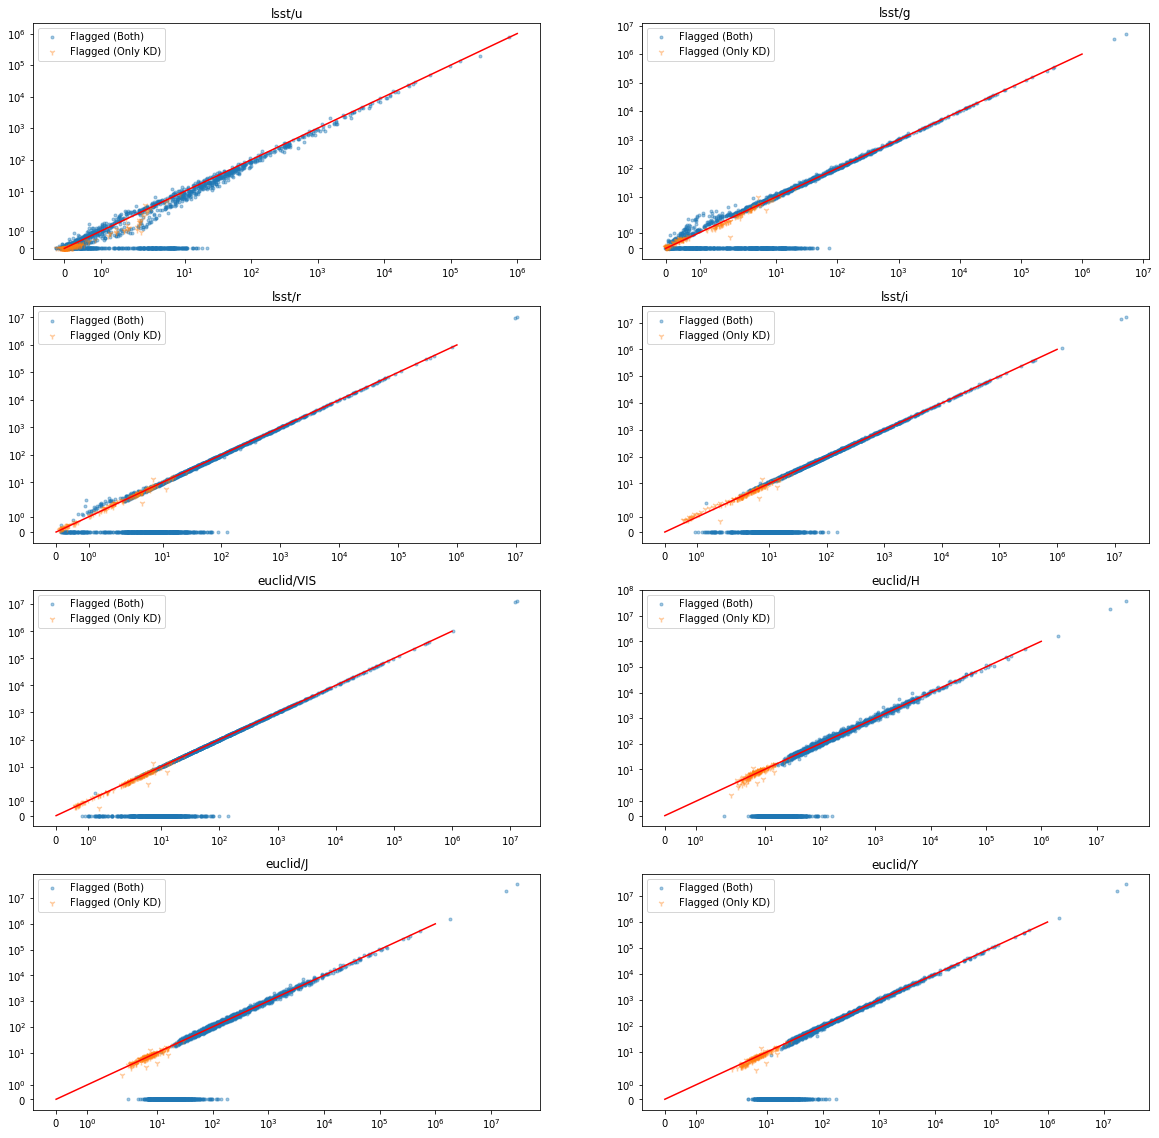

In [7]:
fig, axes = plt.subplots(ncols=2, nrows=len(cols)//2, figsize=(20, 20))
for (rcol, ccol), ax in zip(cols, axes.ravel()):
    ax.set_title(rcol)
    ax.scatter(cross[ccol][both_flagged], cross[rcol+'_MEAN_2'][both_flagged], label='Flagged (Both)', marker='.', alpha=0.4)
    ax.scatter(cross[ccol][kd_flagged & ~brute_flagged], cross[rcol+'_MEAN_2'][kd_flagged & ~brute_flagged], label='Flagged (Only KD)', marker='1', alpha=0.4)
    
    ax.set_xscale('symlog')
    ax.set_yscale('symlog')
    ax.plot([0, 1e6], [0, 1e6], c='red')
    ax.legend()
    
plt.show()

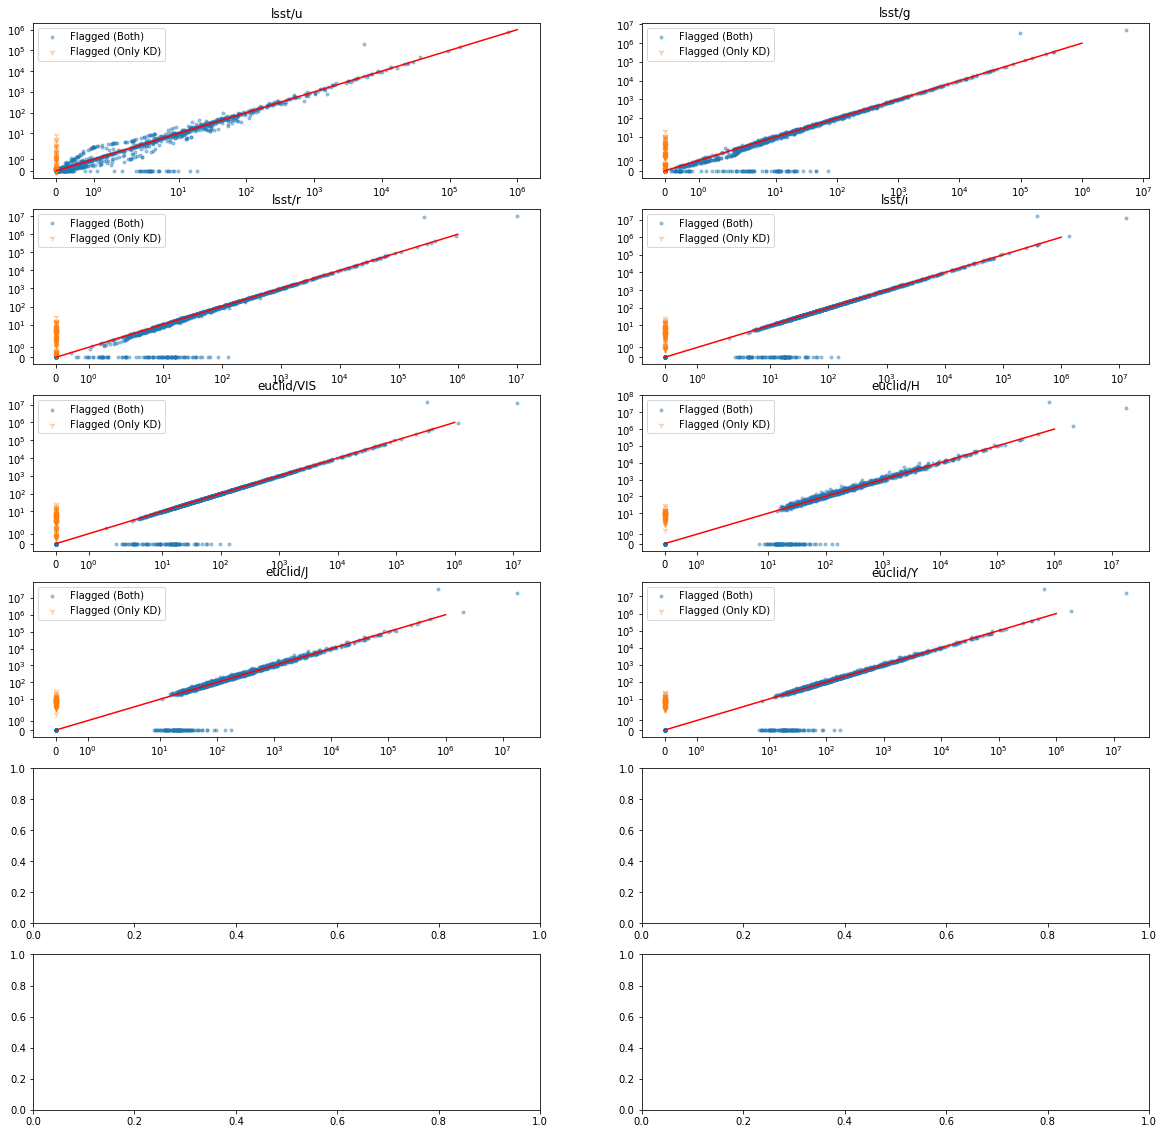

In [8]:
fig, axes = plt.subplots(ncols=2, nrows=len(sub_band)//2, figsize=(20, 20))
for (rcol, ccol), ax in zip(cols, axes.ravel()):
    ax.set_title(rcol)
    ax.scatter(cross[rcol + '_MEAN_1'][both_flagged], cross[rcol+'_MEAN_2'][both_flagged], label='Flagged (Both)', marker='.', alpha=0.4)
    ax.scatter(cross[rcol + '_MEAN_1'][kd_flagged & ~brute_flagged], cross[rcol+'_MEAN_2'][kd_flagged & ~brute_flagged], label='Flagged (Only KD)', marker='1', alpha=0.4)
    
    ax.set_xscale('symlog')
    ax.set_yscale('symlog')
    ax.plot([0, 1e6], [0, 1e6], c='red')
    ax.legend()
    
plt.show()

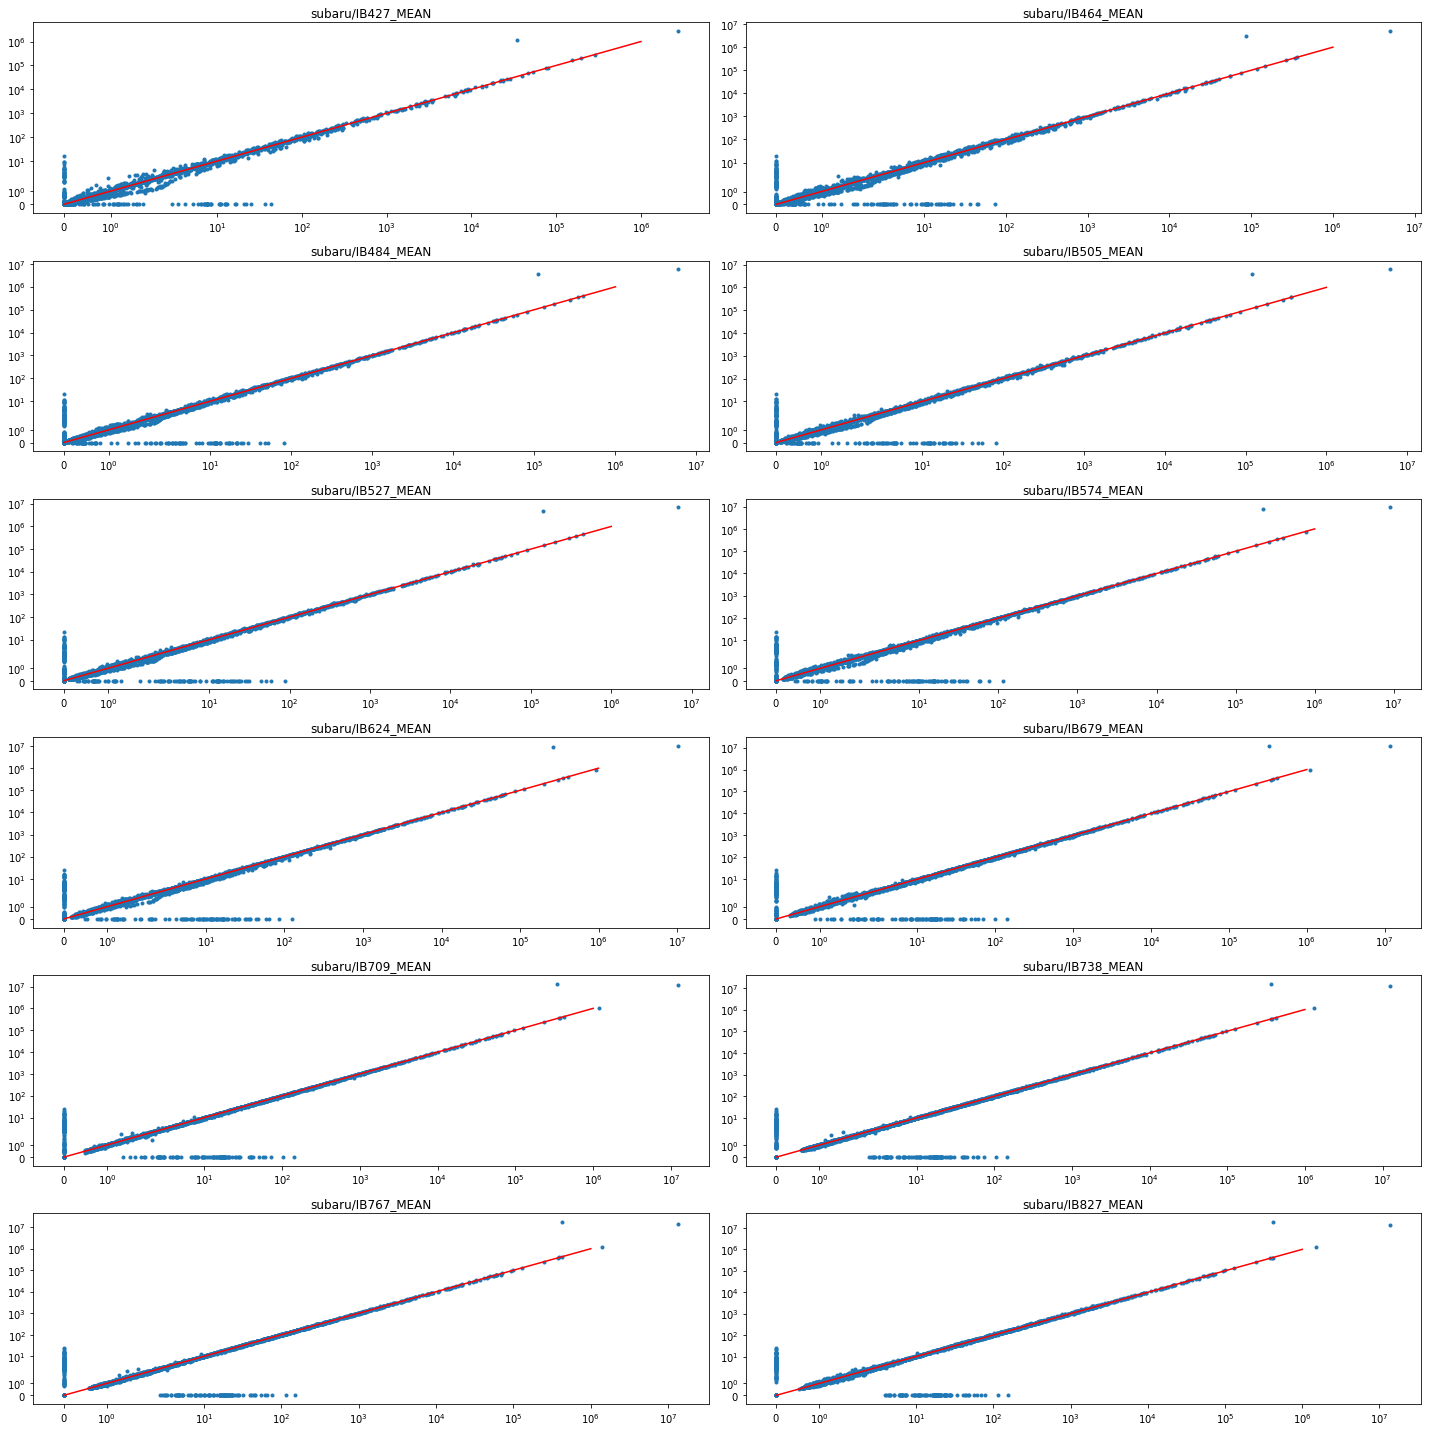

In [9]:
fig, axes = plt.subplots(ncols=2, nrows=len(sub_band)//2, figsize=(20, 20))

for b, ax in zip(sub_band, axes.ravel()):
    ax.set_title(b)
    ax.scatter(cross[b+'_1'], cross[b+'_2'], marker='.')
    ax.set_xscale('symlog')
    ax.set_yscale('symlog')
    ax.plot([0,1e6],[0,1e6], c='red')

plt.tight_layout()
fig.savefig('/home/aalvarez/Downloads/subaru_angular.png')
plt.show()